## Importing libraries

In [1]:
import os
import nltk
import ssl
import json
import random
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
ssl._create_default_https_context = ssl._create_unverified_context
nltk.data.path.append(os.path.abspath("nltk_data"))
nltk.download('punkt')

KeyboardInterrupt: 

## Loading Intents File

In [26]:
import json
with open('intents.json', 'r') as file:
    data = json.load(file)

In [27]:
tags = []
patterns = []
responses = {}
for intent in data["intents"]:
    for pattern in intent["patterns"]:
        patterns.append(pattern)
        tags.append(intent["tag"])

In [28]:
# Create the vectorizer and classifier
vectorizer = TfidfVectorizer()
clf = LogisticRegression(random_state=0, max_iter=10000)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from collections import Counter

In [30]:
# Extract patterns and tags
tags = [intent['tag'] for intent in data["intents"] for pattern in intent['patterns']]
patterns = [pattern for intent in data["intents"] for pattern in intent['patterns']]

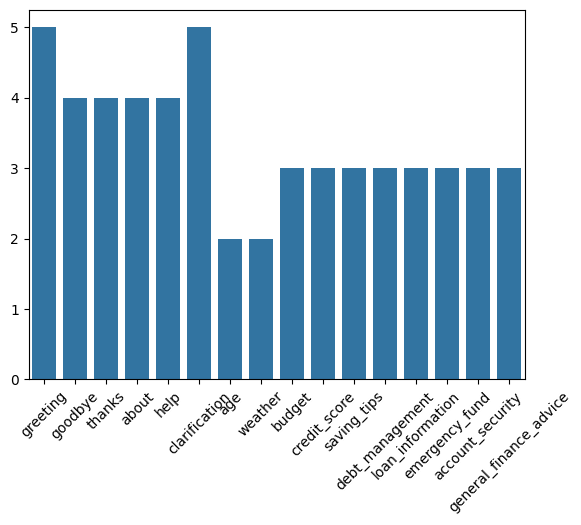

In [31]:
# Tag distribution
tag_counts = Counter(tags)
sns.barplot(x=list(tag_counts.keys()), y=list(tag_counts.values()))
plt.xticks(rotation=45)
plt.show()

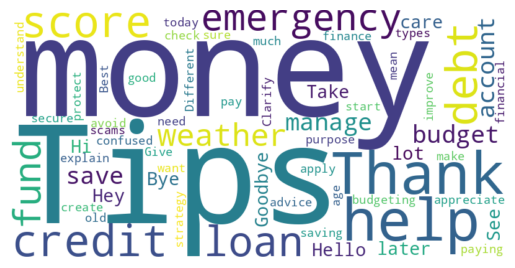

In [32]:
# WordCloud
all_patterns = ' '.join(patterns)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_patterns)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

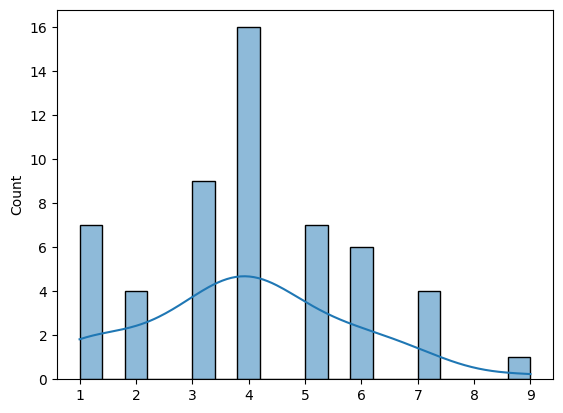

In [33]:
# Pattern Length
pattern_lengths = [len(p.split()) for p in patterns]
sns.histplot(pattern_lengths, kde=True, bins=20)
plt.show()

In [34]:
# Top Words Per Tag
for tag in set(tags):
    tag_patterns = [p for i, p in enumerate(patterns) if tags[i] == tag]
    words = ' '.join(tag_patterns).split()
    print(f"Tag: {tag} - Most common words: {Counter(words).most_common(5)}")

Tag: general_finance_advice - Most common words: [('Give', 1), ('me', 1), ('some', 1), ('finance', 1), ('tips', 1)]
Tag: weather - Most common words: [('the', 2), ('weather', 2), ("What's", 1), ('like', 1), ("How's", 1)]
Tag: help - Most common words: [('I', 2), ('help', 2), ('Help', 1), ('need', 1), ('Can', 1)]
Tag: goodbye - Most common words: [('Bye', 1), ('See', 1), ('you', 1), ('later', 1), ('Goodbye', 1)]
Tag: clarification - Most common words: [('you', 2), ('What', 1), ('do', 1), ('mean?', 1), ('Can', 1)]
Tag: emergency_fund - Most common words: [('an', 3), ('emergency', 3), ('fund?', 3), ('How', 2), ('I', 2)]
Tag: account_security - Most common words: [('How', 2), ('my', 2), ('to', 2), ('do', 1), ('I', 1)]
Tag: about - Most common words: [('What', 3), ('you', 3), ('are', 2), ('can', 1), ('do', 1)]
Tag: debt_management - Most common words: [('How', 2), ('off', 2), ('debt?', 2), ('do', 1), ('I', 1)]
Tag: thanks - Most common words: [('Thanks', 2), ('Thank', 1), ('you', 1), ('a', 

In [35]:
# training the model
x = vectorizer.fit_transform(patterns)
y = tags
clf.fit(x, y)

LogisticRegression(max_iter=10000, random_state=0)

In [36]:
def chatbot(input_text):
    input_text = vectorizer.transform([input_text])
    tag = clf.predict(input_text)[0]
    for intent in intents:
        if intent['tag'] == tag:
            response = random.choice(intent['responses'])
            return response

## My Model

In [45]:
import json
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Load intents file
with open("intents.json") as file:
    data = json.load(file)

# Extract data
training_sentences = []
training_labels = []
responses = {}
for intent in data["intents"]:
    for pattern in intent["patterns"]:
        training_sentences.append(pattern)
        training_labels.append(intent["tag"])
    responses[intent["tag"]] = intent["responses"]

# Encode labels
label_encoder = LabelEncoder()
training_labels = label_encoder.fit_transform(training_labels)

# Tokenize and pad sentences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 1000
embedding_dim = 16
max_len = 20
oov_token = "<OOV>"

tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
sequences = tokenizer.texts_to_sequences(training_sentences)
padded_sequences = pad_sequences(sequences, maxlen=max_len, truncating="post")


from tensorflow.keras import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Build the model
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_len),
    LSTM(32, return_sequences=True),
    Dropout(0.2),
    LSTM(32),
    Dense(16, activation="relu"),
    Dense(len(set(training_labels)), activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Train the model
model.fit(padded_sequences, np.array(training_labels), epochs=200)


Epoch 1/200


c:\Users\Administrator\OneDrive\Desktop\Efficient8\Deep Learning\Deep_Learning_2024\Jr Chatbot\chatenv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 80ms/step - accuracy: 0.1053 - loss: 2.7731
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1053 - loss: 2.7718
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.1053 - loss: 2.7706
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0930 - loss: 2.7706
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0930 - loss: 2.7700
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.0930 - loss: 2.7682
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.1300 - loss: 2.7677
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0806 - loss: 2.7674
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.0930 - loss: 2.7653
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.1840 - loss: 2.7632
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.0826 - loss: 2.7623
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0721 - loss: 2.7638
E

In [38]:
import pickle

# Save the label encoder
with open("label_encoder.pkl", "wb") as file:
    pickle.dump(label_encoder, file)

In [43]:
# Save the tokenizer
tokenizer_json = tokenizer.to_json()
with open("tokenizer.json", "w") as file:
    json.dump(tokenizer_json, file)


In [40]:
model.save("chatbot_model.h5")
model.save("chatbot_model.keras")

In [46]:
def predict_intent(user_input):
    # Preprocess the input
    sequence = tokenizer.texts_to_sequences([user_input])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, truncating="post")
    
    # Predict the intent
    prediction = model.predict(padded_sequence)
    tag = label_encoder.inverse_transform([np.argmax(prediction)])
    
    # Return the predicted tag
    return tag[0]


In [48]:
user_input = input("Enter your question: ")
predicted_tag = predict_intent(user_input)
print(f"Predicted intent: {predicted_tag}")
print(f"Response: {np.random.choice(responses[predicted_tag])}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted intent: about
Response: I am a chatbot
